In [18]:
import requests
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import io
import random

In [19]:
API_URL = "http://localhost:9696/predict"

In [20]:
health = requests.get(API_URL.replace("predict", "health")).json()
health

{'status': 'ok', 'timestamp': '2026-01-28 20:54:37.223341'}

In [21]:
DATA_DIR = Path("../../data/processed/test/Broken")
assert DATA_DIR.exists(), "Dataset path not found"

In [22]:
# Get all image files recursively
image_paths = list(DATA_DIR.rglob("*.jpg")) + list(DATA_DIR.rglob("*.png"))

print(f"Found {len(image_paths)} images")

# Randomly select one
img_path = random.choice(image_paths)
print("Selected image:", img_path)

Found 13 images
Selected image: ../../data/processed/test/Broken/Broken_50.jpg


Text(0.5, 1.0, 'Input image\nBroken')

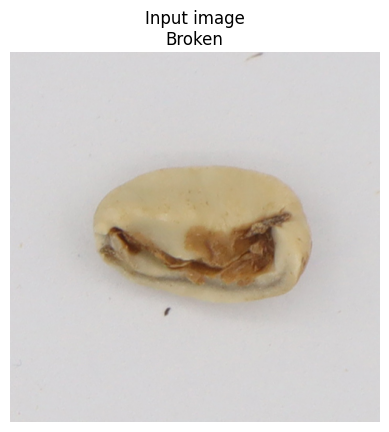

In [23]:
img = Image.open(img_path).convert("RGB")

plt.imshow(img)
plt.axis("off")
plt.title(f"Input image\n{img_path.parent.name}")

In [24]:
buf = io.BytesIO()
img.save(buf, format="JPEG")
buf.seek(0)

files = {
    "file": (img_path.name, buf, "image/jpeg")
}

response = requests.post(API_URL, files=files)

response.status_code


200

In [25]:
response.json()

{'class_id': 7, 'class_name': 'shrivelled', 'confidence': 0.33792293071746826}

In [26]:
result = response.json()

print("🫘 Ground truth folder:", img_path.parent.name)
print("🤖 Predicted class:", result["class_name"])
print("📊 Confidence:", f"{result['confidence']*100:.2f}%")

🫘 Ground truth folder: Broken
🤖 Predicted class: shrivelled
📊 Confidence: 33.79%


In [27]:
for _ in range(5):
    img_path = random.choice(image_paths)
    img = Image.open(img_path).convert("RGB")

    buf = io.BytesIO()
    img.save(buf, format="JPEG")
    buf.seek(0)

    files = {"file": (img_path.name, buf, "image/jpeg")}
    response = requests.post(API_URL, files=files)
    result = response.json()

    print(
        f"GT: {img_path.parent.name:20s} | "
        f"PRED: {result['class_name']:20s} | "
        f"CONF: {result['confidence']:.3f}"
    )


GT: Broken               | PRED: shrivelled           | CONF: 0.754
GT: Broken               | PRED: black                | CONF: 0.978
GT: Broken               | PRED: shrivelled           | CONF: 0.476
GT: Broken               | PRED: black                | CONF: 0.864
GT: Broken               | PRED: shrivelled           | CONF: 0.338
